# Heart Disease Prediction using Machine Learning Classifiers



---


<p align="justify">Predicting heart disease using various machine learning classification models is explored in this analysis. The initial steps involve loading and examining the dataset, followed by essential data preprocessing including feature scaling and splitting the data into training and testing sets. We then proceed to train and evaluate Logistic Regression, Decision Tree, and Random Forest classifiers to assess their effectiveness in identifying individuals with heart disease. To gain insight into its decision-making, the trained Decision Tree is then visualized.


---



## Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63.000000,1,1,145.000000,233.000000,1,2,150.000000,0,2.300000,3,0.0,6.0,0,0
1,67.000000,1,4,160.000000,286.000000,0,2,108.000000,1,1.500000,2,3.0,3.0,2,1
2,67.000000,1,4,120.000000,229.000000,0,2,129.000000,1,2.600000,2,2.0,7.0,1,1
3,37.000000,1,3,130.000000,250.000000,0,0,187.000000,0,3.500000,3,0.0,3.0,0,0
4,41.000000,0,2,130.000000,204.000000,0,2,172.000000,0,1.400000,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,60.072205,1,3,115.422056,181.768595,0,0,128.155858,1,1.001941,2,1.0,7.0,2,1
1020,70.928404,1,2,166.727221,244.993631,1,0,108.481311,0,0.698337,2,1.0,7.0,2,1
1021,57.332875,1,2,105.075177,233.146324,0,2,140.342007,0,1.519138,1,0.0,7.0,2,1
1022,40.881554,0,4,125.068578,154.370678,1,2,123.756294,0,1.936684,2,1.0,7.0,2,1


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1024 non-null   float64
 1   sex            1024 non-null   int64  
 2   cp             1024 non-null   int64  
 3   trestbps       1024 non-null   float64
 4   chol           1024 non-null   float64
 5   fbs            1024 non-null   int64  
 6   restecg        1024 non-null   int64  
 7   thalach        1024 non-null   float64
 8   exang          1024 non-null   int64  
 9   oldpeak        1024 non-null   float64
 10  slope          1024 non-null   int64  
 11  ca             1024 non-null   float64
 12  thal           1024 non-null   float64
 13  num            1024 non-null   int64  
 14  target_binary  1024 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 120.1 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target_binary
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,54.532202,0.685547,3.149414,131.478621,246.965108,0.165039,1.001953,149.638107,0.345703,1.090142,1.619141,0.681641,4.701172,0.923828,0.458984
std,9.273400,0.464525,0.971812,17.506230,52.561237,0.371397,0.993624,23.480260,0.475829,1.072306,0.620176,0.947402,1.941107,1.070377,0.498558
min,18.000000,0.000000,1.000000,84.869643,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.193472,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.555581,0.000000,0.152062,1.000000,0.000000,3.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.012111,244.996816,0.000000,1.000000,151.524700,0.000000,0.854977,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.196437,1.000000,4.000000,142.412148,280.232245,0.000000,2.000000,165.642437,1.000000,1.630471,2.000000,1.000000,7.000000,2.000000,1.000000
max,78.795030,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,227.196592,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


## Define Features and Target

In [6]:
X = df.drop('target_binary', axis=1)
y = df['target_binary']

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Features

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [9]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [12]:
# accuracy, precision, recall, F1-score, confusion matrix.
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"----- {name} -----")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

----- Logistic Regression -----
[[113   0]
 [  1  91]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       1.00      0.99      0.99        92

    accuracy                           1.00       205
   macro avg       1.00      0.99      1.00       205
weighted avg       1.00      1.00      1.00       205

----- Decision Tree -----
[[113   0]
 [  0  92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

----- Random Forest -----
[[113   0]
 [  0  92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                 

## Visualisation

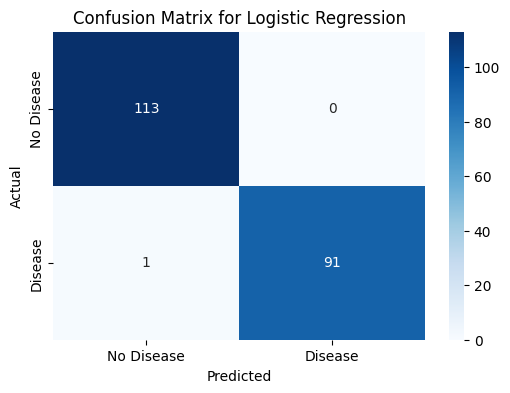

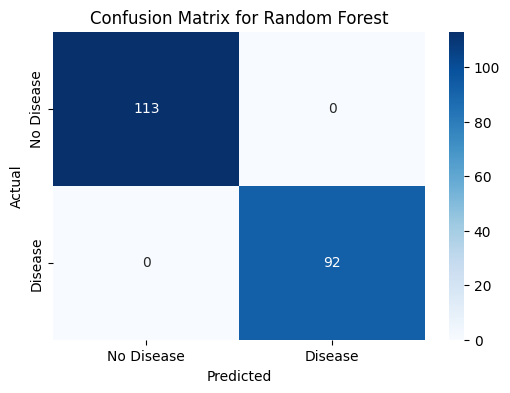

In [49]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Confusion Matrix for Logistic Regression
y_pred_lr = lr.predict(X_test)
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

print('\n')

# Confusion Matrix for Random Forest
y_pred_rf = rf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

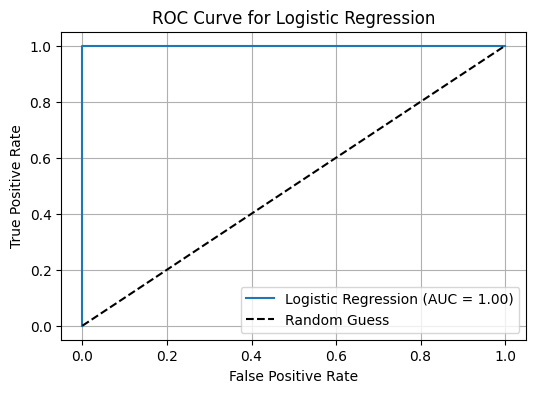

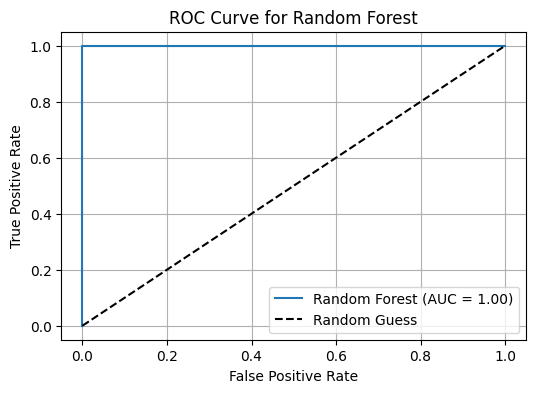

In [50]:
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# ROC Curve and AUC for Logistic Regression
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_lr, 'Logistic Regression')

print('\n')

# ROC Curve and AUC for Random Forest
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_rf, 'Random Forest')

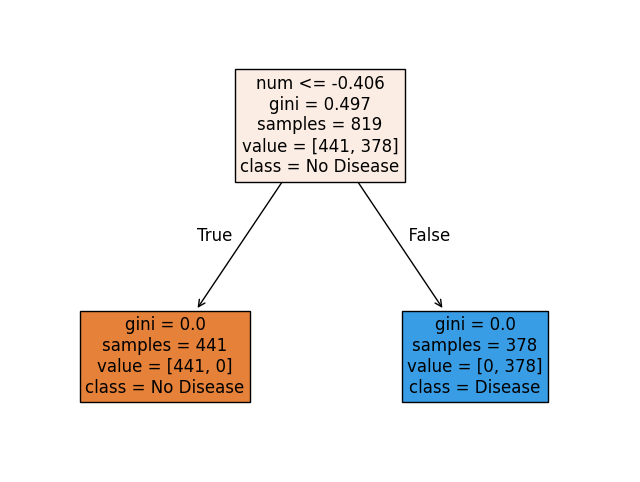

In [51]:
# Decision Tree
plt.figure(figsize=(8,6))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    fontsize=12,
    )
plt.show()

## Conclusion and Findings

This analysis successfully trained and evaluated three machine learning classifiers, Logistic Regression, Decision Tree, and Random Forest, for heart disease prediction. The evaluation metrics (confusion matrix and classification report) indicate that all three models achieved high accuracy on the test set. Specifically, both the Decision Tree and Random Forest models demonstrated perfect precision, recall, and F1-score, while Logistic Regression also performed exceptionally well with only a single misclassification. The visualization of the Decision Tree provided a clear view of the feature importance and decision paths used by the model. These findings suggest that machine learning models can be highly effective in predicting heart disease based on the provided dataset.